In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

import mdtraj as mdt

## 10 ns SMD

In [2]:
path='/media/data_3/scratch/github_path_procedure/'

In [4]:
colv10n=np.loadtxt(path+'./colvar.dat')

In [37]:
!head -n 1 ./colvar.dat

#! FIELDS time d @5.bias @5.force2 @5.d_cntr @5.d_work @5.d_kappa @5.work


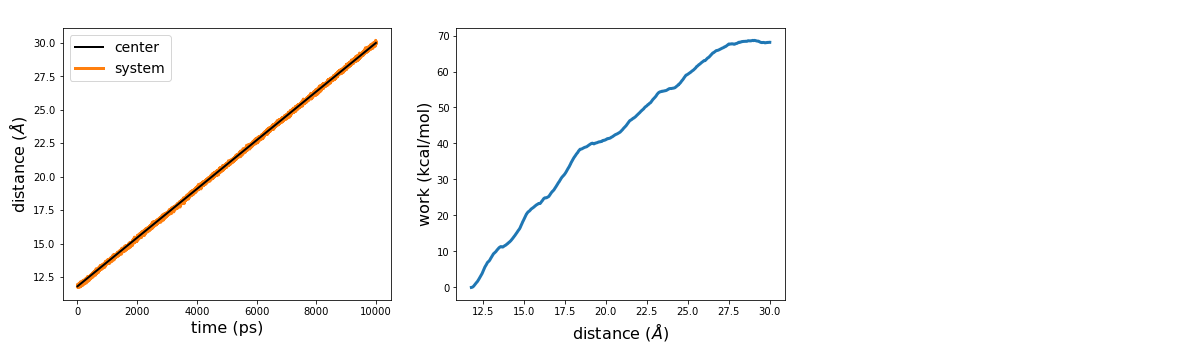

In [6]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.plot(colv10n[:,0],colv10n[:,4]*10,label='center',lw=2,zorder=10,color='black')
plt.plot(colv10n[:,0],colv10n[:,1]*10,lw=3,label='system',color='C1')
plt.legend(fontsize=14)
plt.xlabel('time (ps)',fontsize=16)
plt.ylabel('distance ($\AA$)',fontsize=16)
plt.title('Figure 1A', size=20,color='white')
plt.subplot(1,3,2)
plt.plot(colv10n[:,4]*10,colv10n[:,5]/4.184,lw=3,label='SMD 10 ns',color='C0')
plt.xlabel('distance ($\AA$)',fontsize=16)
plt.ylabel('work (kcal/mol)',fontsize=16)
plt.subplot(1,3,3)
plt.tick_params(axis='both', labelsize=0, length = 0)
plt.axis("off")
#plt.tight_layout()
plt.show()
#plt.savefig('smd.png', format='png', dpi=300, bbox_inches='tight')

## 50 ns SMD

In [7]:
path='/media/data_3/scratch/github_path_procedure/50ns/'

In [8]:
colv50n=np.loadtxt(path+'colvar.dat')

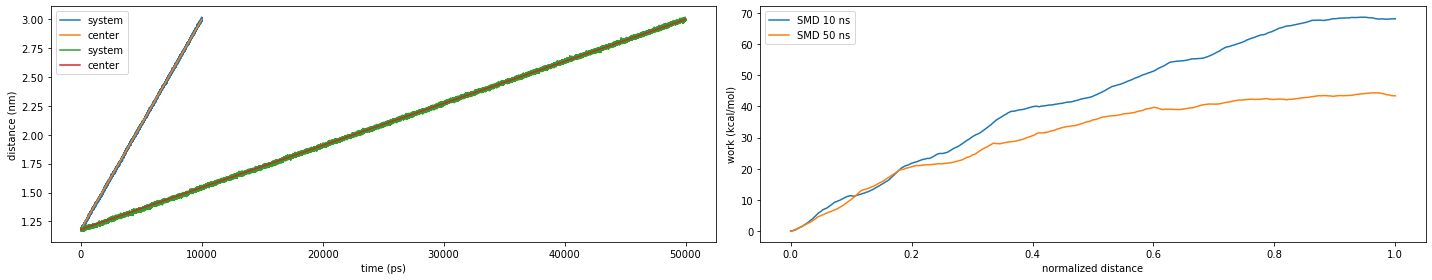

In [9]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
plt.plot(colv10n[:,0],colv10n[:,1],label='system')
plt.plot(colv10n[:,0],colv10n[:,4],label='center')
plt.plot(colv50n[:,0],colv50n[:,1],label='system')
plt.plot(colv50n[:,0],colv50n[:,4],label='center')
plt.legend()
plt.xlabel('time (ps)')
plt.ylabel('distance (nm)')
plt.subplot(1,2,2)
plt.plot((colv10n[:,4]-np.min(colv10n[:,4]))/np.max(colv10n[:,4]-np.min(colv10n[:,4])),colv10n[:,5]/4.184,label='SMD 10 ns',color='C0')
plt.plot((colv50n[:21069,4]-np.min(colv50n[:,4]))/np.max(colv50n[:,4]-np.min(colv50n[:,4])),colv50n[:21069,5]/4.184,label='SMD 50 ns',color='C1')
plt.plot((colv50n[21069:,4]-np.min(colv50n[:,4]))/np.max(colv50n[:,4]-np.min(colv50n[:,4])),(colv50n[21069:,5]+colv50n[21068,5])/4.184,color='C1')
plt.xlabel('normalized distance')
plt.ylabel('work (kcal/mol)')
plt.legend()
plt.tight_layout()
plt.show()

In [49]:
path='/media/data_3/scratch/github_path_procedure/50ns/rmsdmc_morph_rmsdmc/80_frames_trajskip5/redo_with_dbrand_updated_script/'

In [50]:
ener_bidx_df=pd.read_csv(path+'output.csv')
ener_bidx=ener_bidx_df[:-1].to_numpy()

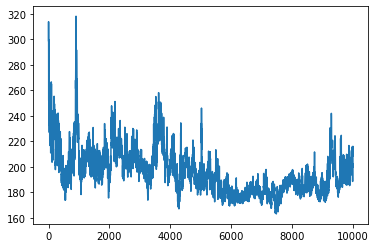

In [51]:
plt.plot(ener_bidx[:,0])
plt.show()

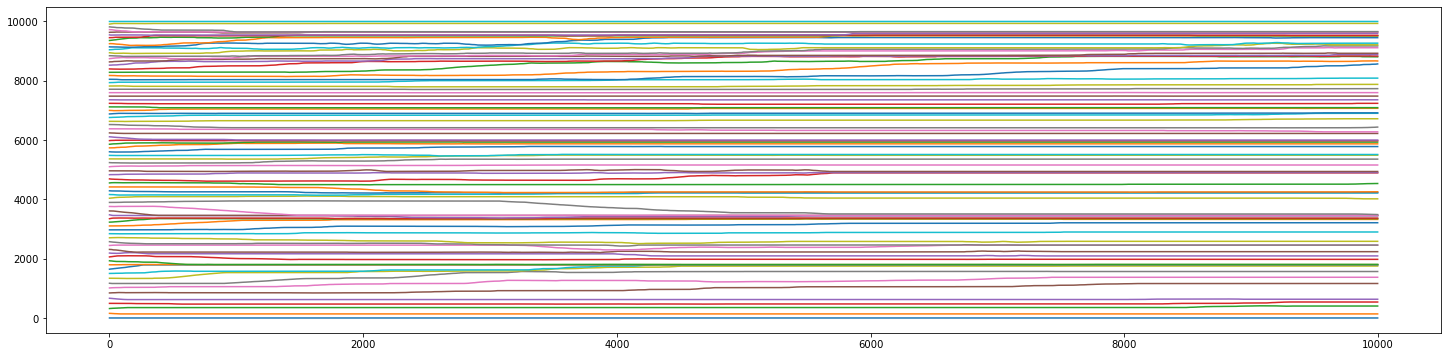

In [52]:
plt.figure(figsize=(25,6))
plt.plot(ener_bidx[:,1:])
plt.show()

In [53]:
# check diagonals (works also while the script is still running)
diags=np.zeros((ener_bidx.shape[0]-1,ener_bidx[:,1:].shape[1]-1))
for i in range(ener_bidx.shape[0]-1):
    diags[i]=np.loadtxt(path+'RMSD_DIAGONAL_%s'%i)[:,1]
diags.shape

(9998, 79)

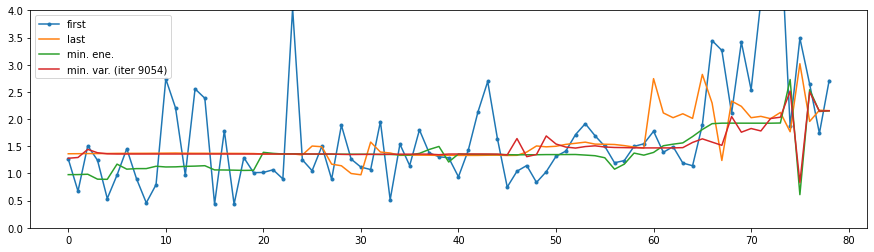

In [37]:
plt.figure(figsize=(15,4))
plt.plot(diags[0],'.-',label='first')
plt.plot(diags[-1],label='last')
plt.plot(diags[np.argmin(ener_bidx[:,0])],label='min. ene.')
plt.plot(diags[np.argmin(np.var(diags,axis=1))],label='min. var. (iter %s)'%(np.argmin(np.var(diags,axis=1))))
plt.ylim(0,4)
plt.legend()
plt.show()

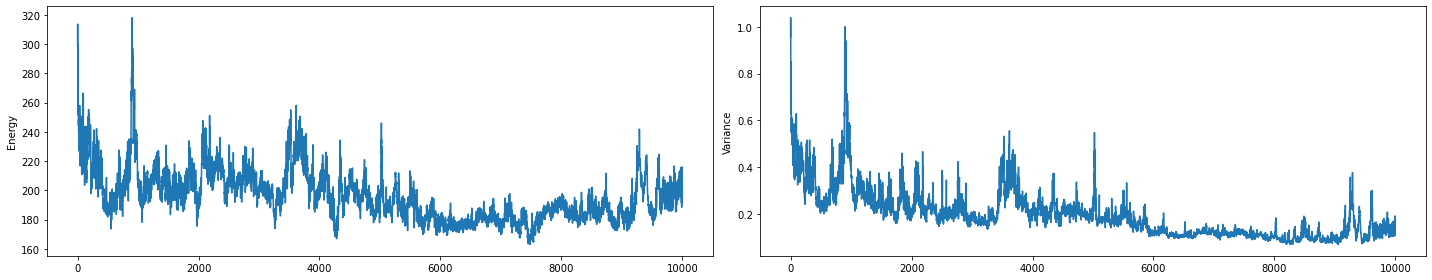

In [38]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
plt.plot(ener_bidx[:,0])
plt.ylabel('Energy')
plt.subplot(1,2,2)
plt.plot(np.var(diags,axis=1))
#plt.hlines(0.02,0,2000,ls='--',color='grey')
plt.ylabel('Variance')
plt.tight_layout()
plt.show()

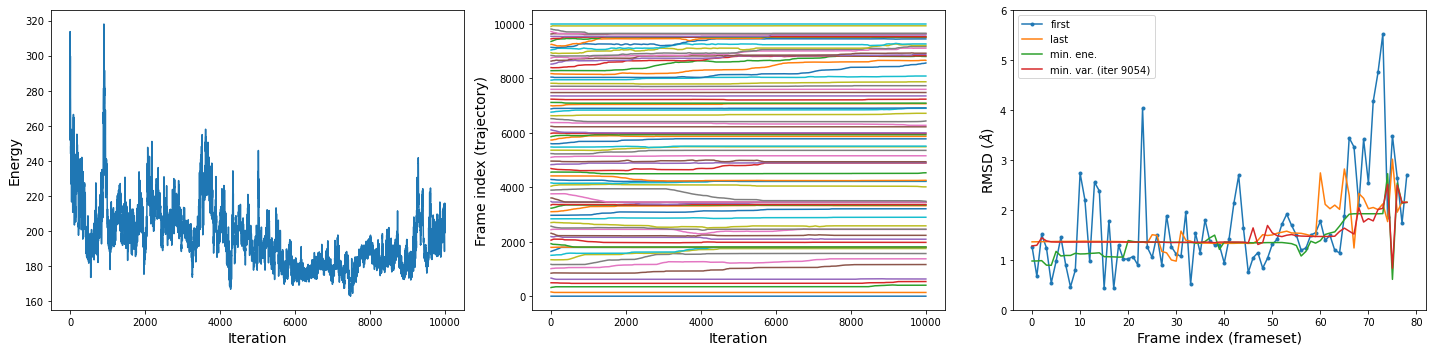

In [43]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.plot(ener_bidx[:,0])
plt.ylabel('Energy',fontsize=14)
plt.xlabel('Iteration',fontsize=14)

plt.subplot(1,3,2)
plt.plot(ener_bidx[:,1:])
plt.ylabel('Frame index (trajectory)',fontsize=14)
plt.xlabel('Iteration',fontsize=14)

plt.subplot(1,3,3)
plt.plot(diags[0],'.-',label='first')
plt.plot(diags[-1],label='last')
plt.plot(diags[np.argmin(ener_bidx[:,0])],label='min. ene.')
plt.plot(diags[np.argmin(np.var(diags,axis=1))],label='min. var. (iter %s)'%(np.argmin(np.var(diags,axis=1))))
plt.ylim(0,6)
plt.ylabel('RMSD ($\AA$)',fontsize=14)
plt.xlabel('Frame index (frameset)',fontsize=14)
plt.legend()

plt.tight_layout()
#plt.show()
plt.savefig('guess_round1_50ns.png',format='png', dpi=300, bbox_inches='tight')

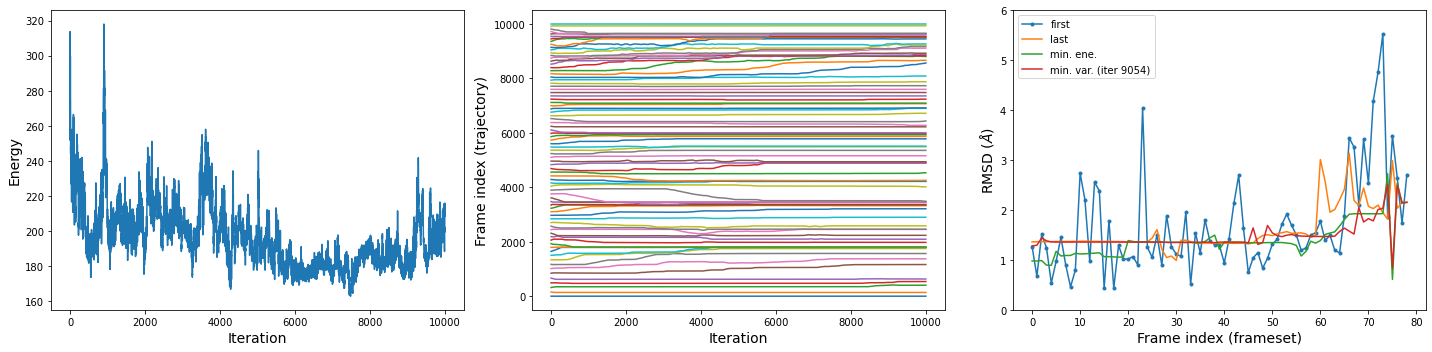

In [54]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.plot(ener_bidx[:,0])
plt.ylabel('Energy',fontsize=14)
plt.xlabel('Iteration',fontsize=14)

plt.subplot(1,3,2)
plt.plot(ener_bidx[:,1:])
plt.ylabel('Frame index (trajectory)',fontsize=14)
plt.xlabel('Iteration',fontsize=14)

plt.subplot(1,3,3)
plt.plot(diags[0],'.-',label='first')
plt.plot(diags[-1],label='last')
plt.plot(diags[np.argmin(ener_bidx[:,0])],label='min. ene.')
plt.plot(diags[np.argmin(np.var(diags,axis=1))],label='min. var. (iter %s)'%(np.argmin(np.var(diags,axis=1))))
plt.ylim(0,6)
plt.ylabel('RMSD ($\AA$)',fontsize=14)
plt.xlabel('Frame index (frameset)',fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()
#plt.savefig('guess_round1_50ns.png',format='png', dpi=300, bbox_inches='tight')

In [44]:
path='50ns/rmsdmc_morph_rmsdmc/80_frames_trajskip5/morph/'

In [ ]:
ener_bidx_df=pd.read_csv(path+'output.csv')
ener_bidx=ener_bidx_df[:-1].to_numpy()

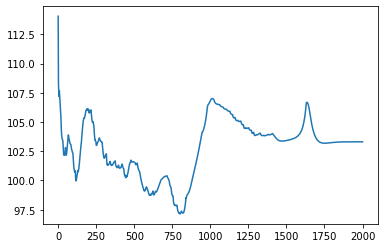

In [47]:
plt.plot(ener_bidx[:,0])
plt.show()

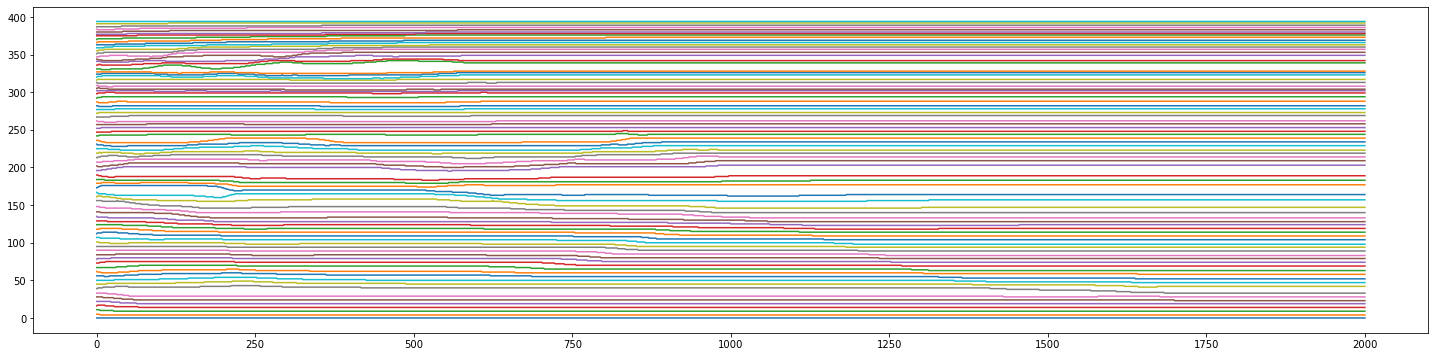

In [50]:
plt.figure(figsize=(25,6))
plt.plot(ener_bidx[:,1:])
plt.show()

In [51]:
diags=np.zeros((ener_bidx.shape[0]-1,ener_bidx[:,1:].shape[1]-1))
for i in range(ener_bidx.shape[0]-1):
    diags[i]=np.loadtxt(path+'RMSD_DIAGONAL_%s'%i)[:,1]
diags.shape

(2000, 79)

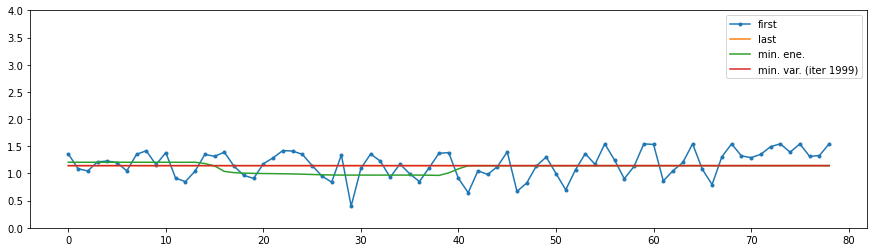

In [52]:
plt.figure(figsize=(15,4))
plt.plot(diags[0],'.-',label='first')
plt.plot(diags[-1],label='last')
plt.plot(diags[np.argmin(ener_bidx[:,0])],label='min. ene.')
plt.plot(diags[np.argmin(np.var(diags,axis=1))],label='min. var. (iter %s)'%(np.argmin(np.var(diags,axis=1))))
plt.ylim(0,4)
plt.legend()
plt.show()

In [53]:
np.min(diags[np.argmin(np.var(diags,axis=1))]),np.max(diags[np.argmin(np.var(diags,axis=1))])

(1.1435296304080642, 1.143556154627219)

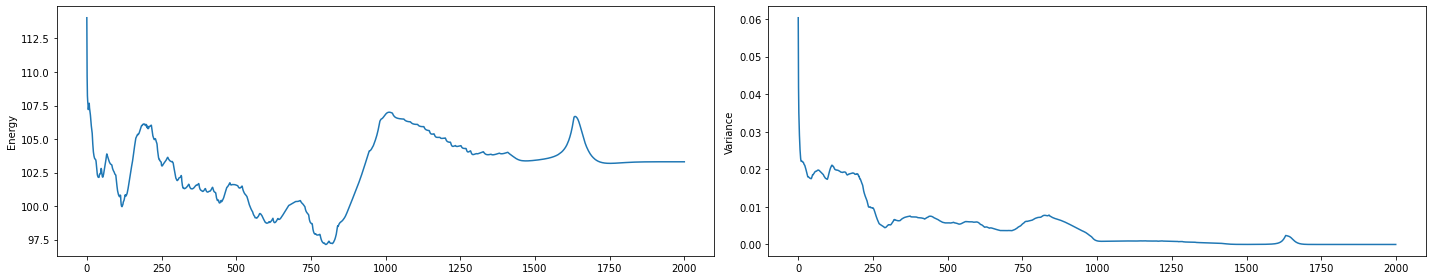

In [54]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
plt.plot(ener_bidx[:,0])
plt.ylabel('Energy')
plt.subplot(1,2,2)
plt.plot(np.var(diags,axis=1))
#plt.hlines(0.02,0,2000,ls='--',color='grey')
plt.ylabel('Variance')
plt.tight_layout()
plt.show()

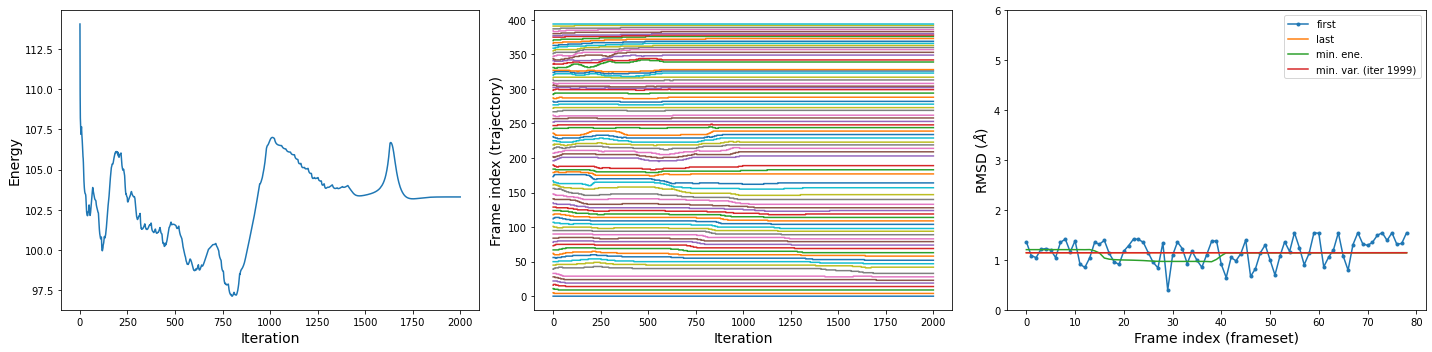

In [57]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.plot(ener_bidx[:,0])
plt.ylabel('Energy',fontsize=14)
plt.xlabel('Iteration',fontsize=14)

plt.subplot(1,3,2)
plt.plot(ener_bidx[:,1:])
plt.ylabel('Frame index (trajectory)',fontsize=14)
plt.xlabel('Iteration',fontsize=14)

plt.subplot(1,3,3)
plt.plot(diags[0],'.-',label='first')
plt.plot(diags[-1],label='last')
plt.plot(diags[np.argmin(ener_bidx[:,0])],label='min. ene.')
plt.plot(diags[np.argmin(np.var(diags,axis=1))],label='min. var. (iter %s)'%(np.argmin(np.var(diags,axis=1))))
plt.ylim(0,6)
plt.ylabel('RMSD ($\AA$)',fontsize=14)
plt.xlabel('Frame index (frameset)',fontsize=14)
plt.legend()

plt.tight_layout()
#plt.show()
plt.savefig('guess_round2_50ns.png',format='png', dpi=300, bbox_inches='tight')

In [27]:
path='/media/data_3/scratch/github_path_procedure/50ns/rmsdmc_morph_rmsdmc/80_frames_trajskip5/morph/project_path/'
colv_path=np.loadtxt(path+'col_projpath')
colv_path.shape

(10001, 3)

In [28]:
!head -n 1 /media/data_3/scratch/github_path_procedure/50ns/rmsdmc_morph_rmsdmc/80_frames_trajskip5/morph/project_path/col_projpath

#! FIELDS time p.sss p.zzz


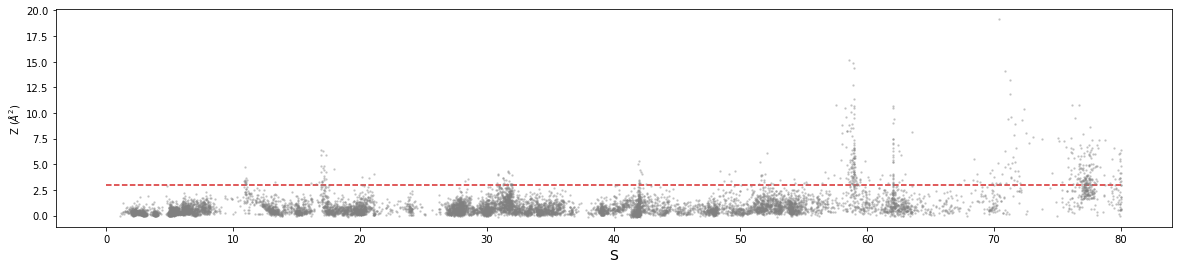

In [34]:
plt.figure(figsize=(20,4))
plt.plot(colv_path[:,1],colv_path[:,2]*100,'.',ms=3,alpha=0.3,color='grey')
plt.xlabel('S',fontsize=14)
plt.ylabel('Z ($\AA^2$)')
plt.hlines(3,0,80,ls='--',color='tab:red')
#plt.show()
plt.savefig('path_projection.png',format='png', dpi=300, bbox_inches='tight')

## 100 ns SMD

In [10]:
path='/media/data_3/scratch/github_path_procedure/100ns/'

In [11]:
colv100n=np.loadtxt(path+'colvar.dat')

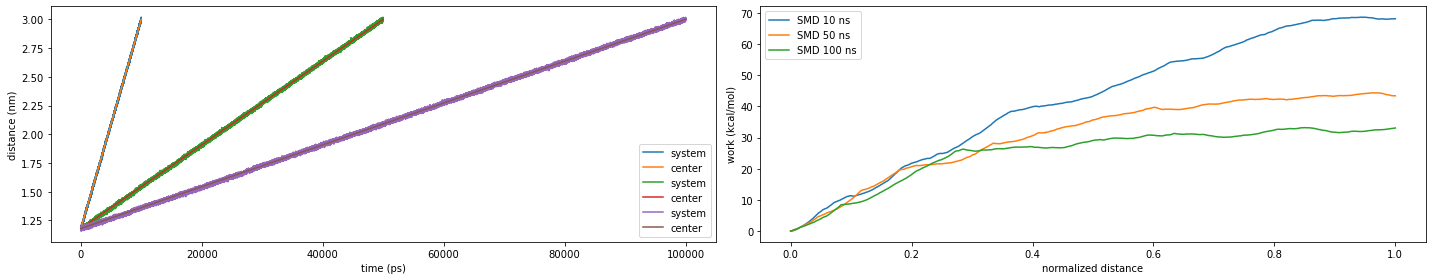

In [12]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
plt.plot(colv10n[:,0],colv10n[:,1],label='system')
plt.plot(colv10n[:,0],colv10n[:,4],label='center')
plt.plot(colv50n[:,0],colv50n[:,1],label='system')
plt.plot(colv50n[:,0],colv50n[:,4],label='center')
plt.plot(colv100n[:,0],colv100n[:,1],label='system')
plt.plot(colv100n[:,0],colv100n[:,4],label='center')
plt.legend()
plt.xlabel('time (ps)')
plt.ylabel('distance (nm)')
plt.subplot(1,2,2)
plt.plot((colv10n[:,4]-np.min(colv10n[:,4]))/np.max(colv10n[:,4]-np.min(colv10n[:,4])),colv10n[:,5]/4.184,label='SMD 10 ns',color='C0')
plt.plot((colv50n[:21069,4]-np.min(colv50n[:,4]))/np.max(colv50n[:,4]-np.min(colv50n[:,4])),colv50n[:21069,5]/4.184,label='SMD 50 ns',color='C1')
plt.plot((colv50n[21069:,4]-np.min(colv50n[:,4]))/np.max(colv50n[:,4]-np.min(colv50n[:,4])),(colv50n[21069:,5]+colv50n[21068,5])/4.184,color='C1')
plt.plot((colv100n[:,4]-np.min(colv100n[:,4]))/np.max(colv100n[:,4]-np.min(colv100n[:,4])),colv100n[:,5]/4.184,label='SMD 100 ns',color='C2')
plt.xlabel('normalized distance')
plt.ylabel('work (kcal/mol)')
plt.legend()
plt.tight_layout()
plt.show()

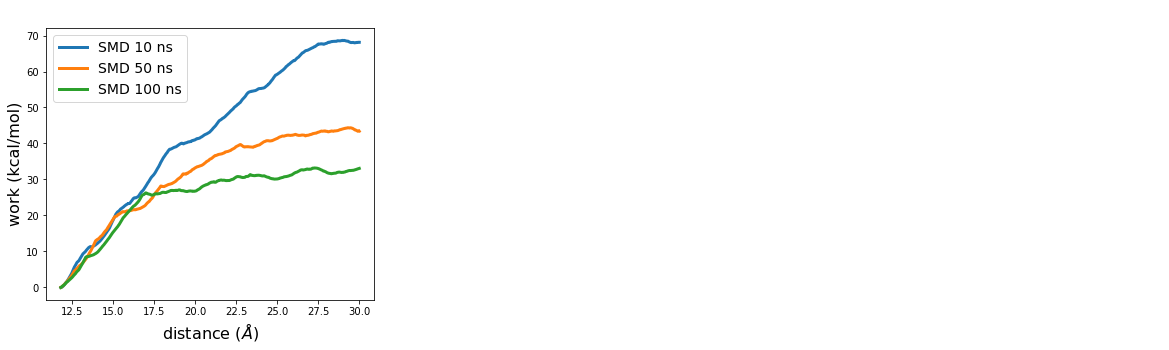

In [13]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.plot(colv10n[:,4]*10,colv10n[:,5]/4.184,lw=3,label='SMD 10 ns',color='C0')
plt.plot(colv50n[:21069,4]*10,colv50n[:21069,5]/4.184,lw=3,label='SMD 50 ns',color='C1')
plt.plot(colv50n[21069:,4]*10,(colv50n[21069:,5]+colv50n[21068,5])/4.184,lw=3,color='C1')
plt.plot(colv100n[:,4]*10,colv100n[:,5]/4.184,lw=3,label='SMD 100 ns',color='C2')

plt.xlabel('distance ($\AA$)',fontsize=16)
plt.ylabel('work (kcal/mol)',fontsize=16)
plt.legend(fontsize=14)
plt.title('Figure 1A', size=20,color='white')

plt.subplot(1,3,2)
plt.tick_params(axis='both', labelsize=0, length = 0)
plt.axis("off")
plt.subplot(1,3,3)
plt.tick_params(axis='both', labelsize=0, length = 0)
plt.axis("off")
plt.show()
#plt.savefig('smd_times.png', format='png', dpi=300, bbox_inches='tight')

### Metad on path

In [36]:
path='/media/data_3/scratch/'

In [71]:
colv50n_metad=np.loadtxt(path+'metad_on_path_50ns/colvar.dat')
hills50n_metad=np.loadtxt(path+'metad_on_path_50ns/HILLS')

In [72]:
!head -n 1 /media/data_3/scratch/metad_on_path_50ns/colvar.dat

#! FIELDS time d p.sss p.zzz meta.bias uwall_z.bias uwall_z.force2 lwall_s_o.bias lwall_s_o.force2 uwall_s_i.bias uwall_s_i.force2


In [73]:
!head -n 1 /media/data_3/scratch/metad_on_path_50ns/HILLS

#! FIELDS time p.sss p.zzz sigma_p.sss sigma_p.zzz height biasf


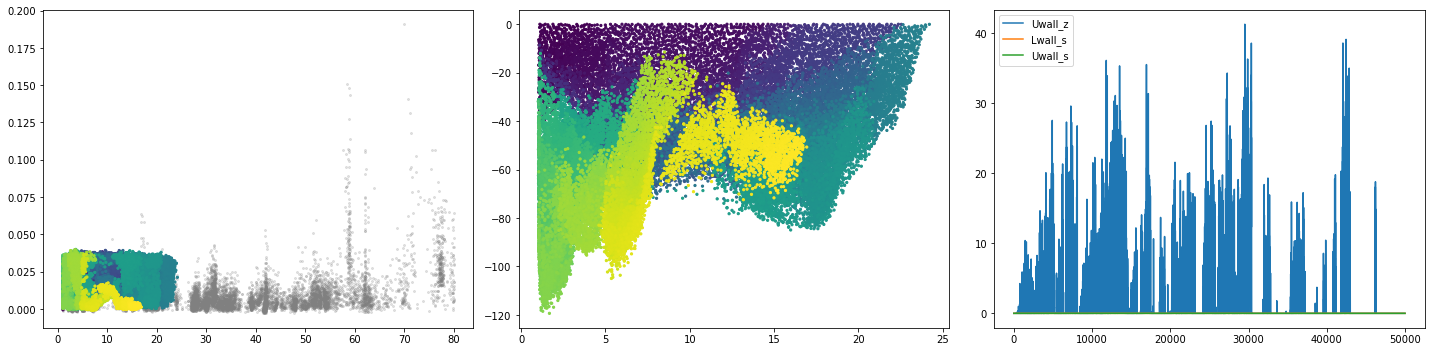

In [74]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.plot(colv_path[:,1],colv_path[:,2],'o',ms=2,alpha=0.2,color='grey',zorder=0)
plt.scatter(colv50n_metad[:,2],colv50n_metad[:,3],s=5,c=np.linspace(1,colv50n_metad.shape[0],colv50n_metad.shape[0]))

plt.subplot(1,3,2)
plt.scatter(colv50n_metad[:,2],-colv50n_metad[:,4],s=5,c=np.linspace(1,colv50n_metad.shape[0],colv50n_metad.shape[0]))

plt.subplot(1,3,3)
plt.plot(colv50n_metad[:,5],label='Uwall_z')
plt.plot(colv50n_metad[:,7],label='Lwall_s')
plt.plot(colv50n_metad[:,9],label='Uwall_s')
plt.legend()

plt.tight_layout()
plt.show()

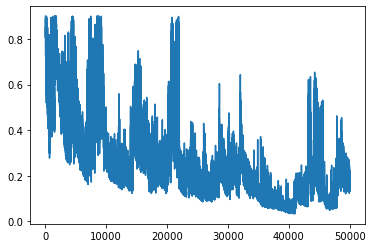

In [75]:
plt.plot(hills50n_metad[:,-2])
plt.show()

In [37]:
X, Y, Z = np.loadtxt(path+'metad_on_path_50ns/fes.dat', unpack=True)[:][0:3]

In [38]:
X = np.reshape(X, (33,677))
Y = np.reshape(Y, (33,677))*100
Z = np.reshape(Z, (33,677)) / 4.184

In [39]:
Z[Z>40] = np.nan # usually set to 30

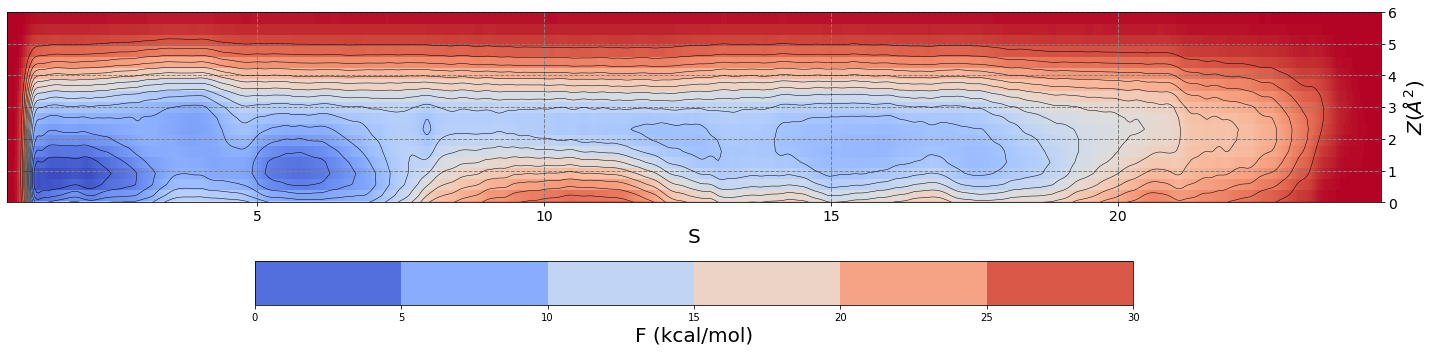

In [42]:
fig = plt.figure(figsize=(20,5))

ax = plt.axes()
levels = np.arange(0, 30, 2)

surf = ax.pcolormesh(X, Y, Z, cmap=cm.coolwarm,shading='auto') # , vmin=0, vmax=25

CS = ax.contour(X, Y, Z, levels, colors='black', linewidths=0.5)

plt.grid(axis='both', color='gray', linestyle='--', linewidth=1)

plt.colorbar(surf, boundaries=np.linspace(0,30,7),orientation="horizontal",pad=0.2).ax.set_xlabel('F (kcal/mol)', fontsize=20)

plt.xlabel("S", fontsize=20)

plt.xticks(fontsize=14)

color=["#f0f0f0","#bdbdbd","#636363"]
labels=['1','2','3']

plt.ylim(0,6)

ax.yaxis.tick_right()
ax.yaxis.set_ticks_position('right') #'both')
plt.yticks(fontsize=14)
ax.yaxis.set_label_position('right') #'both')
plt.ylabel("$Z (\AA^2)$", fontsize=20)

plt.tight_layout()
#plt.show()
plt.savefig('fes_tmp.png', format='png', dpi=300, bbox_inches='tight')

Repeat with larger wall on $Z(\mathbf{R})$:

In [85]:
colv50n_metad=np.loadtxt(path+'metad_on_path_50ns_largerwall/colvar.dat')
hills50n_metad=np.loadtxt(path+'metad_on_path_50ns_largerwall/HILLS')

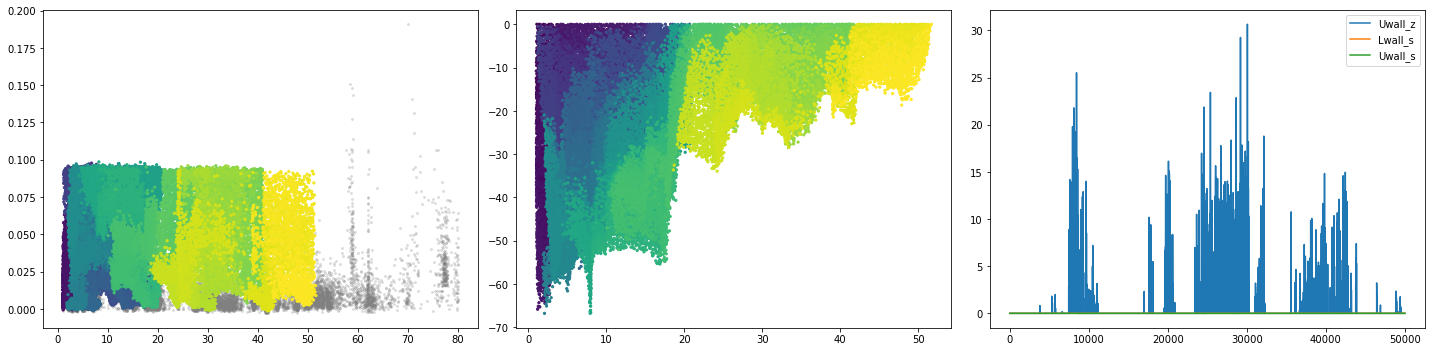

In [86]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.plot(colv_path[:,1],colv_path[:,2],'o',ms=2,alpha=0.2,color='grey',zorder=0)
plt.scatter(colv50n_metad[:,2],colv50n_metad[:,3],s=5,c=np.linspace(1,colv50n_metad.shape[0],colv50n_metad.shape[0]))

plt.subplot(1,3,2)
plt.scatter(colv50n_metad[:,2],-colv50n_metad[:,4],s=5,c=np.linspace(1,colv50n_metad.shape[0],colv50n_metad.shape[0]))

plt.subplot(1,3,3)
plt.plot(colv50n_metad[:,5],label='Uwall_z')
plt.plot(colv50n_metad[:,7],label='Lwall_s')
plt.plot(colv50n_metad[:,9],label='Uwall_s')
plt.legend()

plt.tight_layout()
plt.show()

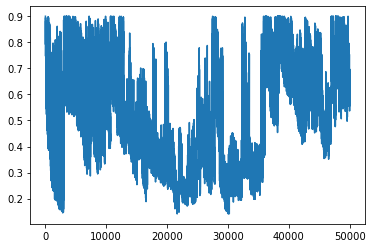

In [88]:
plt.plot(hills50n_metad[:,-2])
plt.show()

In [43]:
X, Y, Z = np.loadtxt(path+'metad_on_path_50ns_largerwall/fes.dat', unpack=True)[:][0:3]

In [44]:
X = np.reshape(X, (50,1453))
Y = np.reshape(Y, (50,1453))*100
Z = np.reshape(Z, (50,1453)) / 4.184

In [45]:
Z[Z>20] = np.nan # usually set to 30

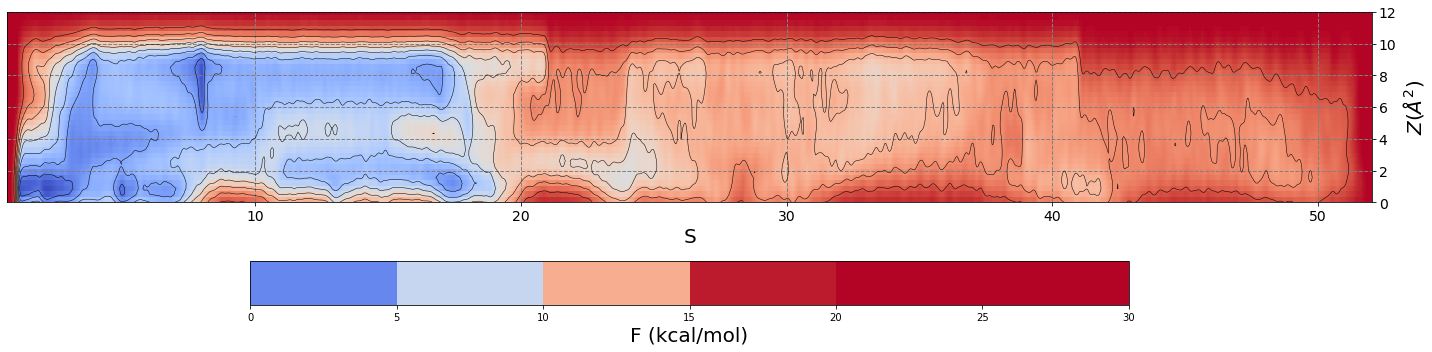

In [48]:
fig = plt.figure(figsize=(20,5))

ax = plt.axes()
levels = np.arange(0, 20, 2)

surf = ax.pcolormesh(X, Y, Z, cmap=cm.coolwarm,shading='auto') # , vmin=0, vmax=25

CS = ax.contour(X, Y, Z, levels, colors='black', linewidths=0.5)

plt.grid(axis='both', color='gray', linestyle='--', linewidth=1)

plt.colorbar(surf, boundaries=np.linspace(0,30,7),orientation="horizontal",pad=0.2).ax.set_xlabel('F (kcal/mol)', fontsize=20)

plt.xlabel("S", fontsize=20)

plt.xticks(fontsize=14)

color=["#f0f0f0","#bdbdbd","#636363"]
labels=['1','2','3']

plt.ylim(0,12)

ax.yaxis.tick_right()
ax.yaxis.set_ticks_position('right') #'both')
plt.yticks(fontsize=14)
ax.yaxis.set_label_position('right') #'both')
plt.ylabel("$Z (\AA^2)$", fontsize=20)


plt.tight_layout()
#plt.show()
plt.savefig('fes_tmp_largerwall.png', format='png', dpi=300, bbox_inches='tight')

#### Extract a specific REPARAM.pdb via mdtraj

In [110]:
np.argmin(np.var(diags,axis=1))

9996

In [111]:
ener_bidx[np.argmin(np.var(diags,axis=1)),1:]

array([  0,   3,   9,  13,  27,  32,  38,  43,  47,  53,  57,  63,  68,
        73,  78,  84,  95,  99, 107, 112, 118, 123, 128, 132, 142, 146,
       152, 157, 162, 169, 174, 179, 183, 189, 194, 199, 203, 207, 213,
       218, 229, 233, 238, 244, 255, 258, 262, 265, 267, 274, 278, 282,
       285, 288, 292, 295, 298, 303, 306, 309, 312, 316, 322, 327, 330,
       333, 336, 340, 348, 363, 367, 370, 373, 377, 380, 382, 386, 388,
       392, 394])

In [114]:
traj=mdt.load(path+'multipdb_morph5.pdb')

/home/mbernett/my_progs/miniconda3/lib/python3.9/site-packages/mdtraj/formats/pdb/pdbfile.py:198: RuntimeWarning: divide by zero encountered in divide
  particle_density = traj.top.n_atoms / traj.unitcell_volumes[0]
/home/mbernett/my_progs/miniconda3/lib/python3.9/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '


In [115]:
path='rmsdmc_morph_rmsdmc/80_frames/morph/'
traj[ener_bidx[np.argmin(np.var(diags,axis=1)),1:]].save(path+'REPARAM_%s.pdb'%(np.argmin(np.var(diags,axis=1))))

#### $S(\mathbf{R})$ mapping 

In [ ]:
path='/media/data_3/scratch/github_path_procedure/50ns/rmsdmc_morph_rmsdmc/80_frames_trajskip5/'

In [ ]:
l=0.9121596235629287

In [ ]:
rmsd_dist=np.loadtxt(path+'RMSD_DIAGONAL_FINAL',usecols=1)
rmsd_dist.shape

(79,)

In [ ]:
cum_rmsd_dist=np.cumsum(rmsd_dist)
cum_rmsd_dist.shape

(79,)

In [ ]:
cum_rmsd_dist_all=np.concatenate((np.array([0]),cum_rmsd_dist))
cum_rmsd_dist_all.shape

(80,)

In [ ]:
ps={}
x=np.linspace(-5, 130,10000)
for i in range(cum_rmsd_dist_all.shape[0]):
    ps[i]=(i+1)*np.exp(-l*(x-cum_rmsd_dist_all[i])**2)

In [ ]:
num=np.zeros(10000)
den=np.zeros(10000)
for key in ps.keys():
    num+=ps[key]
    den+=ps[key]/(key+1)
s=num/den

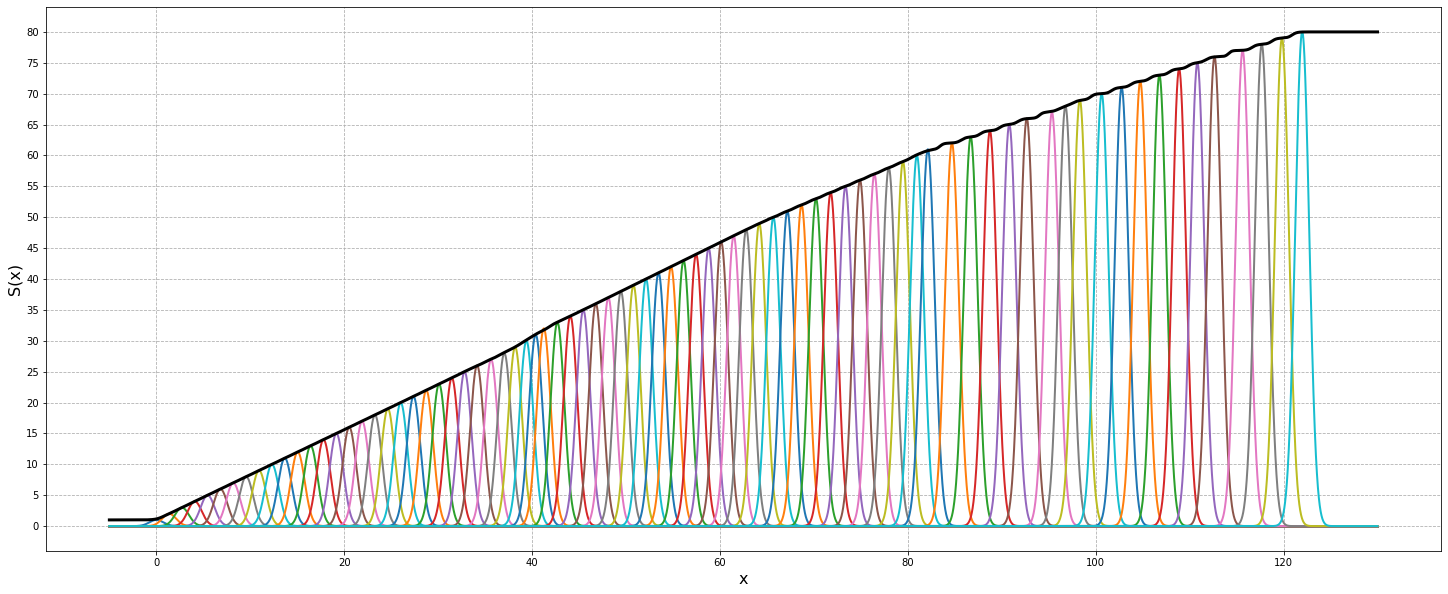

In [ ]:
fig = plt.figure(figsize=(25,10))

for key in ps.keys():
    plt.plot(x,ps[key], linewidth=2)

plt.plot(x,s, linewidth=3, color='Black')

#plt.xlim(-2,125)
plt.yticks(np.arange(0, 81, step=5))
plt.xlabel('x', size='16')
plt.ylabel('S(x)', size='16')
plt.grid(ls='--')
plt.show()

In [ ]:
path='/media/data_3/scratch/github_path_procedure/50ns/rmsdmc_morph_rmsdmc/80_frames_trajskip5/morph/'

In [ ]:
l=1.758859805591339

In [ ]:
rmsd_dist=np.loadtxt(path+'RMSD_DIAGONAL_FINAL',usecols=1)
rmsd_dist.shape

(79,)

In [ ]:
cum_rmsd_dist=np.cumsum(rmsd_dist)
cum_rmsd_dist.shape

(79,)

In [ ]:
cum_rmsd_dist_all=np.concatenate((np.array([0]),cum_rmsd_dist))
cum_rmsd_dist_all.shape

(80,)

In [ ]:
ps={}
x=np.linspace(-5, 95,10000)
for i in range(cum_rmsd_dist_all.shape[0]):
    ps[i]=(i+1)*np.exp(-l*(x-cum_rmsd_dist_all[i])**2)

In [ ]:
num=np.zeros(10000)
den=np.zeros(10000)
for key in ps.keys():
    num+=ps[key]
    den+=ps[key]/(key+1)
s=num/den

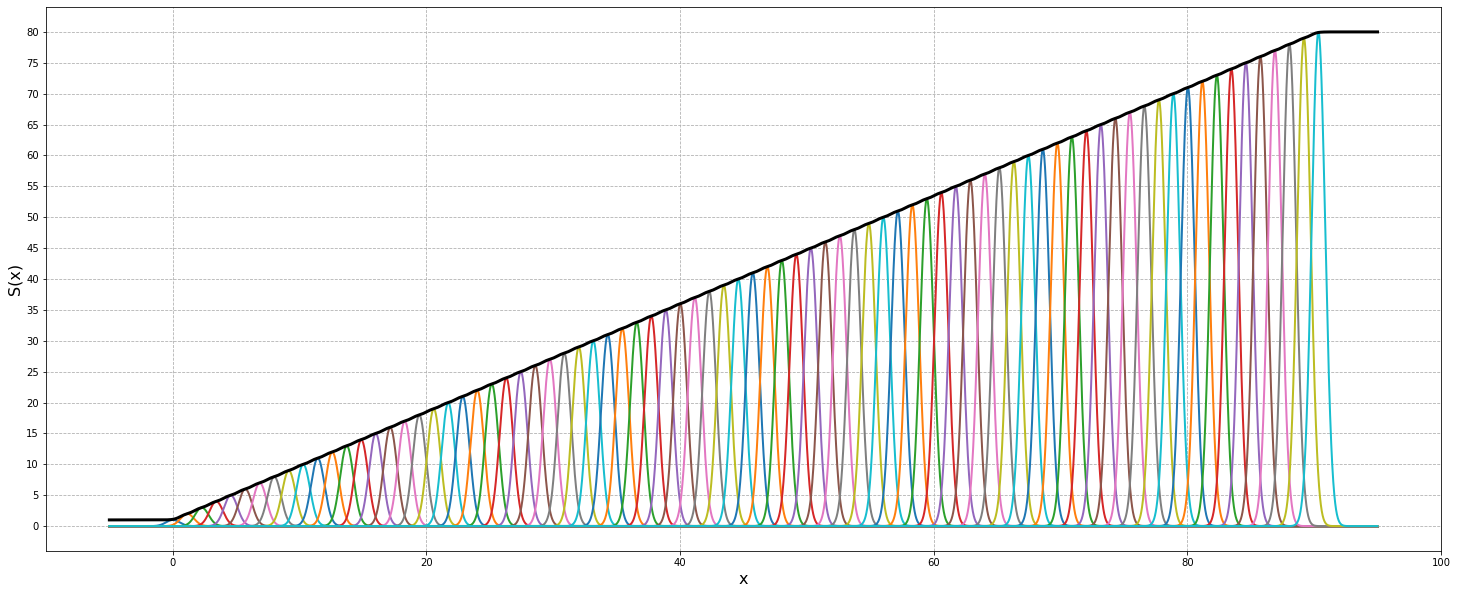

In [ ]:
fig = plt.figure(figsize=(25,10))

for key in ps.keys():
    plt.plot(x,ps[key], linewidth=2)

plt.plot(x,s, linewidth=3, color='Black')

#plt.xlim(-2,92)
plt.yticks(np.arange(0, 81, step=5))
plt.xlabel('x', size='16')
plt.ylabel('S(x)', size='16')
plt.grid(ls='--')
plt.show()